### Import Dependencies

In [25]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np


### Read in the csv file grouped by date with a count of crime type for each city

In [26]:
austin_total = pd.read_excel('Austin/austin_by_date_2016.xlsx',
                             sheet_name='austin_by_date_2016')
austin_avg = pd.read_excel('Austin/austin_by_date_2016.xlsx',
                           sheet_name='austin_by_date_2016_avg')
austin_holidays = pd.read_excel('Austin/austin_by_date_2016.xlsx',
                                sheet_name='austin_by_date_2016 _holidays')
la_total = pd.read_excel('Los_Angles_city/LA_by_date_2016.xlsx',
                         sheet_name='LA_by_date_2016')
la_avg = pd.read_excel('Los_Angles_city/LA_by_date_2016.xlsx',
                       sheet_name='LA_by_date_2016_avg')
la_holidays = pd.read_excel('Los_Angles_city/LA_by_date_2016.xlsx',
                            sheet_name='LA_by_date_2016_holidays')
chicago_total = pd.read_excel('Chicago_City/chicago_date_group_2016.xlsx',
                              sheet_name='chicago_date_group_2016')
chicago_avg = pd.read_excel('Chicago_City/chicago_date_group_2016.xlsx',
                            sheet_name='chicago_date_group_2016_avg')
chicago_holidays = pd.read_excel('Chicago_City/chicago_date_group_2016.xlsx',
                                 sheet_name='chicago_date_group_2016_holiday')
cities_total = pd.read_excel('cities_by_date_2016.xlsx',
                             sheet_name='combined_cities_2016')
cities_avg = pd.read_excel('cities_by_date_2016.xlsx',
                           sheet_name='combined_cities_2016_avg')
cities_holidays = pd.read_excel('cities_by_date_2016.xlsx',
                                sheet_name='combined_cities_2016_holidays')
cities = pd.read_csv('cities_by_date_2016.csv')

holiday_df = pd.read_csv("retail_holidays.csv")

holiday_2016_df = holiday_df[['Retail Holidays','2016 Year']]

holiday_2016_df

hol_dates = holiday_2016_df['2016 Year']

pheonix = pd.read_csv('pheonix_crimes_by_date.csv')
pheonix_2016 = pheonix[pheonix['Date'].str.contains('2016')]
pheonix_2016.head()

LA_2016_hol = pd.read_csv('LA_2016_holidays.csv')
hol_form_la = LA_2016_hol[:-2]

chicago_2016_hol = pd.read_csv('chicago_2016_holidays.csv')
hol_form_chicago = chicago_2016_hol[:-2]

austin_2016_hol = pd.read_csv('austin_2016_holidays.csv')
hol_form_austin = austin_2016_hol[:-2]

In [27]:
holidays_df = pd.read_csv('retail_holidays.csv')
hol_2016 = holidays_df.drop(['2015 Year','2017 Year','2018 Year'], axis = 1)

holiday_2016 = pheonix_2016.merge(hol_2016, left_on='Date', right_on='2016 Year', how='left')
holiday_2016.drop('2016 Year', axis=1, inplace=True)
hol_2016_pheonix = holiday_2016.dropna(how = 'any')

# Sum Phoenix Holiday Crimes.
motor_hol = hol_2016_pheonix['MOTOR VEHICLE THEFT'].sum()
theft_hol = hol_2016_pheonix['LARCENY-THEFT'].sum()
sex_hol = hol_2016_pheonix['RAPE'].sum()
drug_hol = hol_2016_pheonix['DRUG OFFENSE'].sum()
burglary_hol = hol_2016_pheonix['BURGLARY'].sum() 
assault_hol = hol_2016_pheonix['AGGRAVATED ASSAULT'].sum()
murder_hol = hol_2016_pheonix['MURDER AND NON-NEGLIGENT MANSLAUGHTER'].sum() 
robbery_hol = hol_2016_pheonix['ROBBERY'].sum() 
arson_hol = hol_2016_pheonix['ARSON'].sum(--) 

# Add all crimes together.
pheonix_hol_crime = (motor_hol + theft_hol + sex_hol + drug_hol + burglary_hol + 
                 assault_hol + murder_hol + robbery_hol + arson_hol)
# Summed crimes for LA, Chicago, and Austin. 
la_hol_crime = hol_form_la['Total Crime Count'].sum()
chicago_hol_crime = hol_form_chicago['Total Crime Count'].sum()
austin_hol_crime = hol_form_austin['Total Crime Count'].sum()

### Convert to dataframes

In [28]:
# Austin DataFrames
austin_total_df = pd.DataFrame(austin_total)
austin_avg_df = pd.DataFrame(austin_avg)
austin_holidays_df = pd.DataFrame(austin_holidays)

# LA Data Frames
la_total_df = pd.DataFrame(la_total)
la_avg_df = pd.DataFrame(la_avg)
la_holidays_df = pd.DataFrame(la_holidays)

# Chicago Data Frames
chicago_total_df = pd.DataFrame(chicago_total)
chicago_avg_df = pd.DataFrame(chicago_avg)
chicago_holidays_df = pd.DataFrame(chicago_holidays)

# Cities Data Frames
cities_total_df = pd.DataFrame(cities_total)
cities_avg_df = pd.DataFrame(cities_avg)
cities_holidays_df = pd.DataFrame(cities_holidays)

cities_df = pd.DataFrame(cities)

motor_p = pheonix_2016['MOTOR VEHICLE THEFT'].sum()
theft_p = pheonix_2016['LARCENY-THEFT'].sum()
sex_p = pheonix_2016['RAPE'].sum()
drug_p = pheonix_2016['DRUG OFFENSE'].sum()
burglary_p = pheonix_2016['BURGLARY'].sum() 
assault_p = pheonix_2016['AGGRAVATED ASSAULT'].sum()
murder_p = pheonix_2016['MURDER AND NON-NEGLIGENT MANSLAUGHTER'].sum() 
robbery_p = pheonix_2016['ROBBERY'].sum() 
arson_p = pheonix_2016['ARSON'].sum() 
pheonix_total_crime = (motor_p + theft_p + sex_p + drug_p + burglary_p + 
                 assault_p + murder_p + robbery_p + arson_p)

la_pop = 3981000
chicago_pop = 2720000
austin_pop = 938200
phoenix_pop = 1602000

la_crime_total = la_total_df['Total Crime Count'].sum() - la_hol_crime
austin_crime_total = austin_total_df['Total Crime Count'].sum() - austin_hol_crime
chicago_crime_total = chicago_total_df['Total Crime Count'].sum() - chicago_hol_crime

#print(la_crime_total, austin_crime_total, chicago_crime_total)
la_capita = (la_crime_total / la_pop)
chicago_capita = (chicago_crime_total / chicago_pop)
austin_capita = (austin_crime_total / austin_pop)
pheonix_capita = (pheonix_total_crime / phoenix_pop)

print(la_capita, chicago_capita, austin_capita)

capita_df = pd.DataFrame ({'City': ['Los Angeles', 'Austin', 'Chicago', 'Pheonix'],
                          'Population': [la_pop, austin_pop, chicago_pop, phoenix_pop],
                          'Total Crime': [la_crime_total, austin_crime_total, chicago_crime_total, pheonix_total_crime],
                          'Crimes Per Capita x 10': [la_capita.round(2)*100, austin_capita.round(2)*100, 
                           chicago_capita.round(2)*100, pheonix_capita.round(2)*100]})

crime_df = pd.DataFrame ({'City': ['Los Angeles', 'Austin', 'Chicago', 'Pheonix'],
                          'Population': [la_pop, austin_pop, chicago_pop, phoenix_pop],
                          'Total Crime': [la_crime_total, austin_crime_total, chicago_crime_total, pheonix_total_crime],
                          'Crimes Per Capita x 10': [la_capita.round(2)*100, austin_capita.round(2)*100, 
                           chicago_capita.round(2)*100, pheonix_capita.round(2)*100]})

cities_df = pd.DataFrame ({'City': ['Los Angeles', 'Austin', 'Chicago', 'Pheonix'],
                          'Population': [la_pop, austin_pop, chicago_pop, phoenix_pop],
                          'Total Crime': [la_crime_total, austin_crime_total, chicago_crime_total, pheonix_total_crime],
                          'Crimes Per Capita x 100': [la_capita.round(2)*100, austin_capita.round(2)*100, 
                           chicago_capita.round(2)*100, pheonix_capita.round(2)*100]})

cities_df

0.09838909821652851 0.1437029411764706 0.0806277979108932


,City,Population,Total Crime,Crimes Per Capita x 100
0,Los Angeles,3981000,391687.0,10.0
1,Austin,938200,75645.0,8.0
2,Chicago,2720000,390872.0,14.0
3,Pheonix,1602000,44437.0,3.0


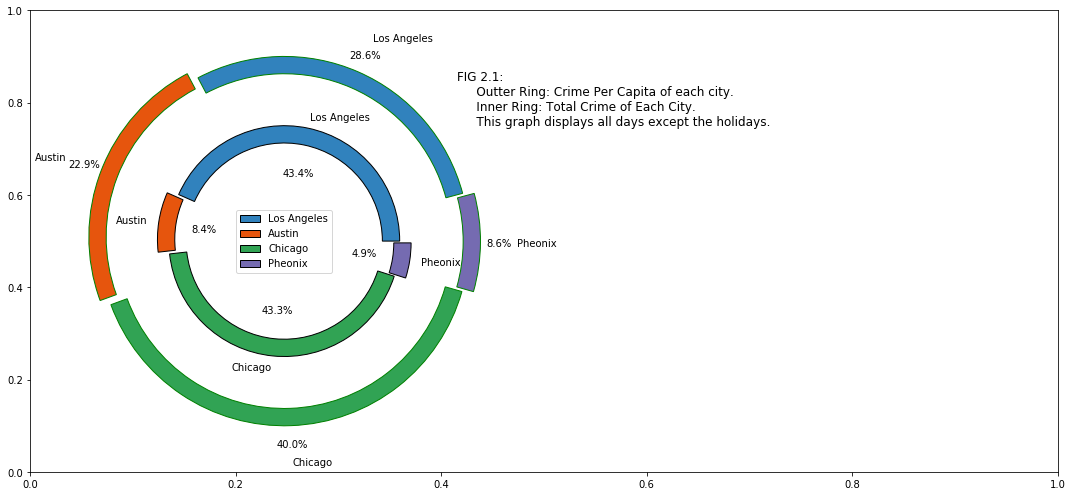

In [29]:
# Build Nested Donut for Crime per Capita Compared to Total Crime. 
# Does not display crime for holidays.
fig, ax = plt.subplots(figsize = (15,7))
ax = fig.add_subplot(323)
explode = (0, 0.2, 0, 0.2)
size = 0.3
per_capita = np.array(capita_df['Crimes Per Capita x 10'])
total_crime = np.array(capita_df['Total Crime'])
capita_cities = capita_df['City']
crime_cities = crime_df['City']
legend_cities = cities_df['City']

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(np.arange(4)*4)

# Inner ring.
ax.pie(total_crime, explode = explode, labels = crime_cities, radius=2.3-size, 
       autopct='%1.1f%%', colors=inner_colors, startangle = 360,
       wedgeprops=dict(width=size, edgecolor='black'))

# Add legend and set aspect for donuts. 
plt.legend(loc='center')
ax.set(aspect="equal")

# Outer ring.
ax.pie(per_capita, explode = explode, labels =capita_cities, radius=3.2, autopct='%1.1f%%', 
       pctdistance=1.1, labeldistance=1.2, colors=outer_colors, startangle = 15,
       wedgeprops=dict(width=size, edgecolor='g'))

# Add text for figure name and pie chart details.
plt.text(3, 2, s ='FIG 2.1:\n     Outter Ring: Crime Per Capita of each city. \n     Inner Ring: Total Crime of Each City.\n     This graph displays all days except the holidays.', fontsize = 12)

# Set layout and save figure. 
plt.tight_layout()
plt.savefig('figures/reg_year_nexted_pie.png', dpi = 100)

# Show figure. 
plt.show()

## Q2. Analysis

To measure the rate of crime in each city we calculated the crime per capita of each city and then also compared it to the total crime in each city. Comparing the data in FIG 2.1 shows us that the frequency of crime in the year 2016, per the sample set, is not necessarily correlated to the amount of crime, and population size in the given cities.

In [30]:
# Determine holiday crime per capita for holidays only.
la_hol_capita = la_hol_crime / la_pop
austin_hol_capita = austin_hol_crime / austin_pop
chicago_hol_capita = chicago_hol_crime / chicago_pop
pheonix_hol_capita = pheonix_hol_crime / phoenix_pop

# Holidays crimes per capita data frame.
holidays_df = pd.DataFrame ({'City': ['Los Angeles', 'Austin', 'Chicago', 'Pheonix'],
                          'Population': [la_pop, austin_pop, chicago_pop, phoenix_pop],
                          'Total Crime': [la_hol_crime, austin_hol_crime, chicago_hol_crime, pheonix_hol_crime],
                          'Crimes Per Capita x 1000': [la_hol_capita*1000, austin_hol_capita*1000, 
                           chicago_hol_capita*1000, pheonix_hol_capita*1000]})

holidays_df

,City,Population,Total Crime,Crimes Per Capita x 1000
0,Los Angeles,3981000,10767.0,2.704597
1,Austin,938200,1971.0,2.100831
2,Chicago,2720000,9976.0,3.667647
3,Pheonix,1602000,986.0,0.615481


From the above Data Frame we can see that Phoenix and Austin both had lower crime per capita rates through out the entire year, excluding the holiday dates set that were sampled. Because of the population size from this data we can neither prove or deny a correlation in overall crime, population, and the crime per capita. 

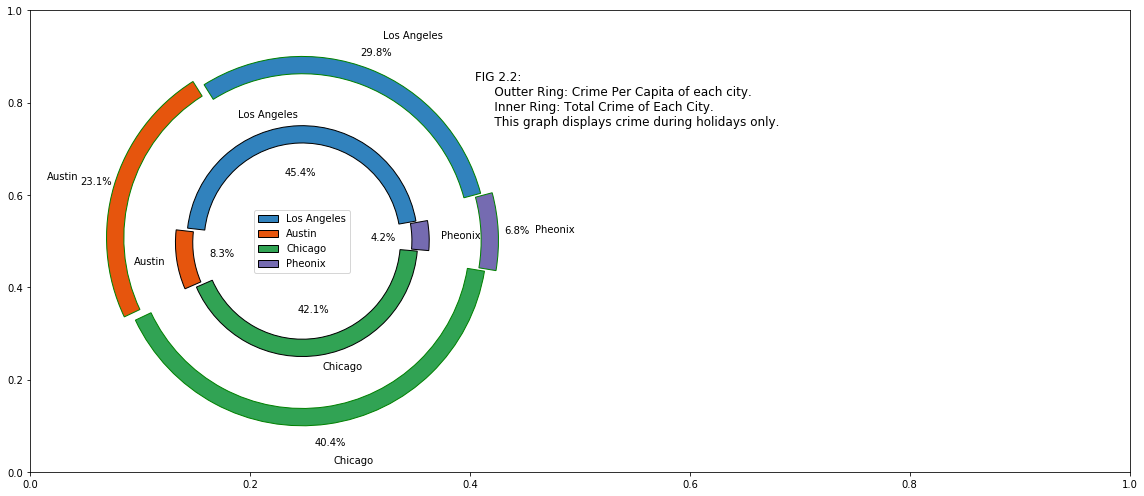

In [31]:
# Build nested donut for crime per capita compared to total crime. 
# Does not display crime for the rest of the year. Only the sampled holidays. 

# Plot variable and sub plot declartion. Set size of plot. 
fig, ax = plt.subplots(figsize = (16,7))
ax = fig.add_subplot(323)

# Set variabes for donuts. 
explode = (0, 0.2, 0, 0.2)
size = 0.3
hol_capita = np.array(holidays_df['Crimes Per Capita x 1000'])
hol_crime = np.array(holidays_df['Total Crime'])
hol_cities = holidays_df['City']
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(np.arange(4)*4)

# Inner ring.
ax.pie(hol_crime, explode = explode, labels = hol_cities, radius=2.3-size, 
       autopct='%1.1f%%', colors=inner_colors, startangle = 370,
       wedgeprops=dict(width=size, edgecolor='black'))

# Add legend and set aspect. 
plt.legend(loc='center')
ax.set(aspect="equal")

# Outer ring.
ax.pie(hol_capita, explode = explode, labels =hol_cities, radius=3.2, autopct='%1.1f%%', 
       pctdistance=1.1, labeldistance=1.2, colors=outer_colors, startangle = 15,
       wedgeprops=dict(width=size, edgecolor='g'))

# Add text for figure name and pie chart details.
plt.text(3, 2, s ='FIG 2.2:\n     Outter Ring: Crime Per Capita of each city. \n     Inner Ring: Total Crime of Each City.\n     This graph displays crime during holidays only.', fontsize = 12)

# Set layout and save figure. 
plt.tight_layout()
plt.savefig('figures/hol_year_nexted_pie.png', dpi = 100)

# Show figure. 
plt.show()

In the above figure, FIG 2, we can see what the crime per capita (CpC) and total crime percentages were for just the 19 sampled holidays. Comparing Fig 2 to Fig 1 you can see that was a minor increase in crime per capita in Austin but a decrease in phoenix.

Phoenix CPC 2016: 8.6%						Phoenix Holiday CPC 2016: 6.8%
Austin CPC 2016: 22.9%						Austin Holiday CPC 2016: 23.1%

Per this data set we are not able to observe any large increase in crime during the holidays in lower CpC cities. 


### Summary of Questions for analysis:
1.        Is there an increase in crime during major shopping holidays? 
2.        Which Crimes are most prevalent during major shopping holidays? 
3.        Are there specific cities more prone to an increase in crime during major shopping holidays?
4.        Do cities with the least amount of crime experience an increase in crime that is more than noticeable during major shopping holidays? 
5.        *insert new question*. 

Great sample resource:

* UCFLM201809DATA2/05-Matplotlib/3/Activities/10-Stu_Fits_and_Regression/Solved/crime.ipynb 
* https://github.com/UCF-Coding-Boot-Camp/UCFLM201809DATA2/blob/master/05-Matplotlib/3/Activities/10-Stu_Fits_and_Regression/Solved/crime.ipynb

###  Is there an increase in crime during major shopping holidays? 

### Definition of shopping holidays:

###  Is there an increase in crime during major shopping holidays? 

* ### Use cities_dfs to answer this question
* ### Charts should use: cities_df_avg (base)  vs cities_df_holidays

In [ ]:
# Dataframes to use:
#cities_avg_df
#cities_holidays_df

# chart 1 : Line chart

#save chart ('../Images/chart.png')

In [ ]:
# chart 2

#save chart ('../Images/chart.png')

### Which Crimes are most prevalent during major holidays? 

* ### Use cities_dfs to answer this question
* ### Charts should use: cities_df_holidays and cities_df_avg
* #### Chart 1: simple bar chart using cities_df_holidays totals. crime types on x-axis.
* #### Analysis 1: Will provide a glimpse of crimes on major shoppping holidays
* #### Chart 2: bar chart1: holiday crime with crime type on x-axis vs bar chart2: avg crime with crime type on x-axis
* #### Analysis 2: B/c this chart includes the avg crime as a base, we can determine if a crime is more prevalent during the holiday specifically, or if there is simply more of these types of crimes committed regardless of holiday/non holiday

In [ ]:
# Dataframes to use:
#cities_holidays_df

# chart 1 bar chart. Note: crime types go on x-axis

#save chart ('../Images/chart.png')

In [ ]:
# chart 2

#save chart ('../Images/chart.png')

### Are there specific cities more prone to an increase in crime during major holidays?

* #### Analysis: Focus on aggregated crime data for each city. Do not need specifics of each crime type right now
* #### Avg crime in chicago (base) vs Total crime on holiday in chicago. Calc holiday crime total - base (repeat for each city). Which city experiences greatest increase/decrease in crime ?

* #### Also consider: Avg crime in chicago (base) vs Avg crime on holiday in chicago. Calc holiday crime avg - base (repeat for each city). Which city experiences greatest increase/decrease in crime ?

In [ ]:
# Dataframes to use:
#austin_holidays_df
#austin_avg_df
#la_holidays_df
#la_avg_df
#chicago_holidays_df
#chicago_avg_df


# chart 1

#save chart ('../Images/chart.png')

In [ ]:
# chart 2

#save chart ('../Images/chart.png')

### Do cities with the least amount of crime experience an increase in crime that is more than noticeable during major holidays?

* #### This question is a bit subjective b/c it does not acct for population size. Use the method below to answer question:
* #### Find crime per captia: simply divide the total crime by the total population of the city
* #### Next, find the city with the lowest per captia crime
* #### Finally, for the city with the lowest per captia crime, use data frm question 3 and display the increase/decrease in crime during major holidays vs base (avg annual crime)

In [ ]:
# population #s frm United States Census Bureau: 

la_pop = 3981000
chicago_pop = 2720000
austin_pop = 938200 

# chart 1

#save chart ('../Images/chart.png')

In [ ]:
# chart 2

#save chart ('../Images/chart.png')

### Bonus Question. This question should be answered LAST after questions 1-4 have been answered with corresponding charts/conclusions. Use google Maps API.
* #### Choose one city: Chicago or LA:
* #### Map crime location base vs crime location during holiday. Use base location plotting as one symbol, holiday location plotting using a different symbol
* #### Include on map, major(predefined) retail location. Use one symbol to represent these retail locations. Plot location of holiday crimes using a different symbol. Does there appear to be any concenstration of crimes near these retail locations.

#### Predefined Retail locations:
* #### Wal-mart
* #### Bestbuy
* #### Radio Shack
* #### One other major retail store

In [ ]:
# chart 1

#save chart ('../Images/chart.png')

In [ ]:
# chart 2

#save chart ('../Images/chart.png')

### Conclusion
* Based on the data in this study, crime does/does not seem to increase during major shopping holidays
* Based on the data in this study, crime1,crime2, crime3, seem to be more prevelant during major shopping holidays
* Based on the data in this study, cityn, citym, cityk, seem to be more prone to an increase in crime during major shopping holidays
* Based on the data in the study, cities with the least amount of crime do/do not seem to experience an increase in crime that's more noticeable during major shopping holidays

### A step further
* limitations of the study: time constraints, lack of crime expertise, reliability of data
* biases of the study
* improvements: how study can be improved
* Major takeways